<a href="https://colab.research.google.com/github/CharlotteY2003/MIT-Futuremakers/blob/main/7_16_Intro_Dataset_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Sequential
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import mnist
from keras.layers import *
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [4]:
X_train = X_train.reshape(-1, X_train.shape[1] * X_train.shape[2])
X_test = X_test.reshape(-1, X_test.shape[1] * X_test.shape[2])

In [5]:
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

In [6]:
def createModel(layer_sizes):
  model = Sequential()
  model.add(Dense(units = layer_sizes[0], activation = 'sigmoid', input_shape = (int(X_train.shape[1]),)))
  for s in layer_sizes[1:]:
    model.add(Dense(units = s, activation = 'sigmoid'))
  model.add(Dense(units = 10, activation='softmax'))
  #model.summary()
  return model

In [7]:
def model_eval(model, batch_num = 128, epochs=10):
  model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])
  history = model.fit(X_train, y_train, batch_size = batch_num, epochs = epochs, validation_split = .1, 
          steps_per_epoch = X_train.shape[0] // 128, verbose=0)
  loss, accuracy = model.evaluate(X_test, y_test)

  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_loss'])
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.title('Accuracy over number of epochs')
  plt.legend(['training', 'validation'], loc='best')
  plt.show()

  print()
  print(f'Test loss: {loss: .3}')
  print(f'Test accuracy: {accuracy: .3}')

#Testing Number of Hidden Layers in MLP

Dense layers: 2
313/313 [==============================] - 0s 1ms/step - loss: 0.3669 - accuracy: 0.9078


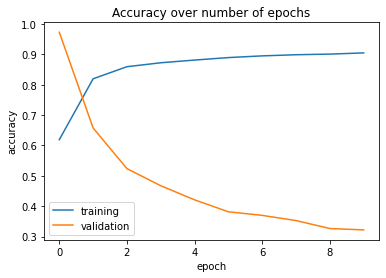


Test loss:  0.367
Test accuracy:  0.908
Dense layers: 3
313/313 [==============================] - 0s 1ms/step - loss: 0.7190 - accuracy: 0.8530


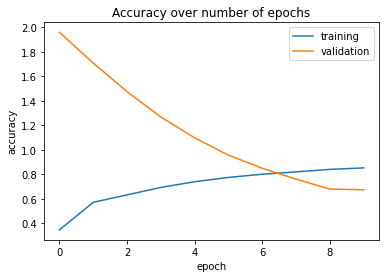


Test loss:  0.719
Test accuracy:  0.853
Dense layers: 4
313/313 [==============================] - 0s 1ms/step - loss: 1.7269 - accuracy: 0.5725


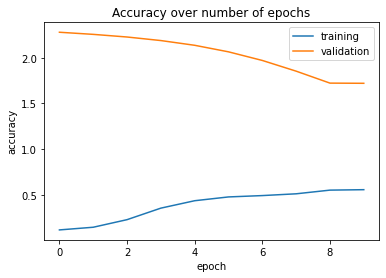


Test loss:  1.73
Test accuracy:  0.572
Dense layers: 5
313/313 [==============================] - 0s 1ms/step - loss: 2.2798 - accuracy: 0.1183


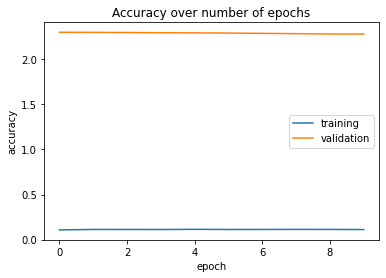


Test loss:  2.28
Test accuracy:  0.118


In [8]:
for layers in range(1,5):
  print('Dense layers: ' + str(layers+1))
  model = createModel([32] * layers)
  model_eval(model)

#Testing Number of Nodes in each Hidden Layer

313/313 [==============================] - 0s 1ms/step - loss: 0.3852 - accuracy: 0.9019


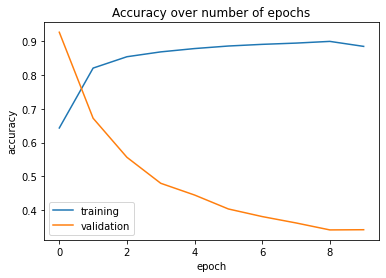


Test loss:  0.385
Test accuracy:  0.902
313/313 [==============================] - 0s 1ms/step - loss: 0.2957 - accuracy: 0.9233


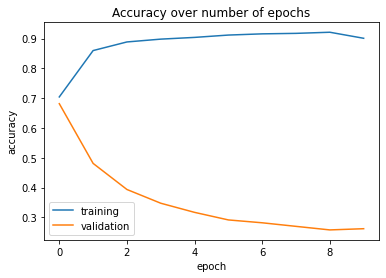


Test loss:  0.296
Test accuracy:  0.923
313/313 [==============================] - 0s 1ms/step - loss: 0.2487 - accuracy: 0.9313


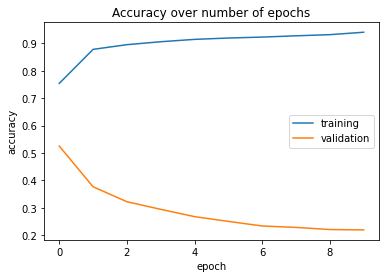


Test loss:  0.249
Test accuracy:  0.931
313/313 [==============================] - 1s 2ms/step - loss: 0.2125 - accuracy: 0.9409


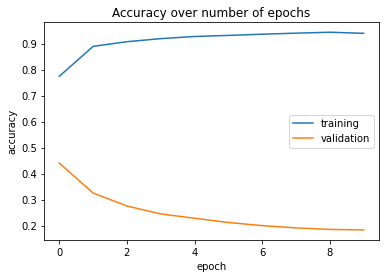


Test loss:  0.213
Test accuracy:  0.941
313/313 [==============================] - 1s 3ms/step - loss: 0.1925 - accuracy: 0.9464


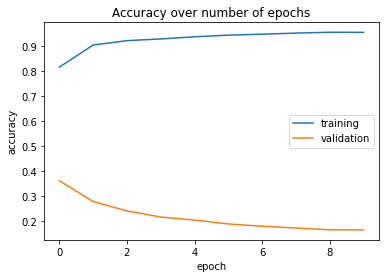


Test loss:  0.193
Test accuracy:  0.946
313/313 [==============================] - 1s 4ms/step - loss: 0.1651 - accuracy: 0.9522


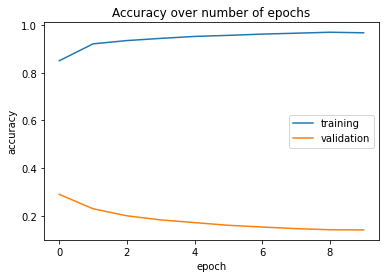


Test loss:  0.165
Test accuracy:  0.952
313/313 [==============================] - 2s 6ms/step - loss: 0.1461 - accuracy: 0.9550


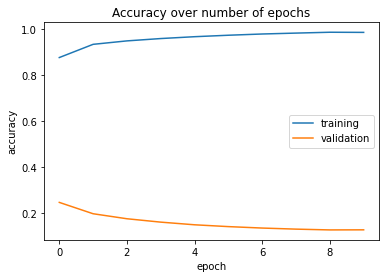


Test loss:  0.146
Test accuracy:  0.955


In [9]:
for node in [32,64,128,256,512,1024,2048]:
  model = createModel([node])
  model_eval(model)

#Testing combination of width and depth in MLP


313/313 [==============================] - 0s 1ms/step - loss: 0.6788 - accuracy: 0.8566


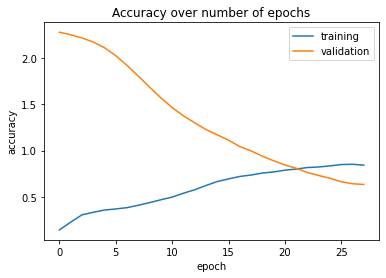


Test loss:  0.679
Test accuracy:  0.857
313/313 [==============================] - 0s 1ms/step - loss: 1.3071 - accuracy: 0.5397


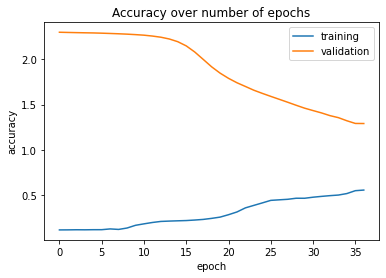


Test loss:  1.31
Test accuracy:  0.54
313/313 [==============================] - 0s 1ms/step - loss: 2.2716 - accuracy: 0.2023


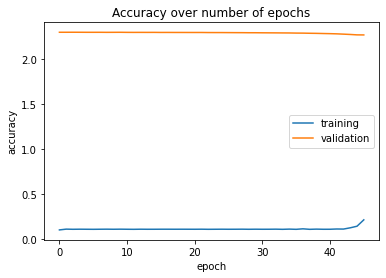


Test loss:  2.27
Test accuracy:  0.202
313/313 [==============================] - 1s 2ms/step - loss: 0.2764 - accuracy: 0.9253


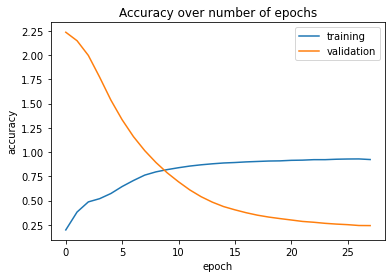


Test loss:  0.276
Test accuracy:  0.925
313/313 [==============================] - 1s 2ms/step - loss: 0.5024 - accuracy: 0.8886


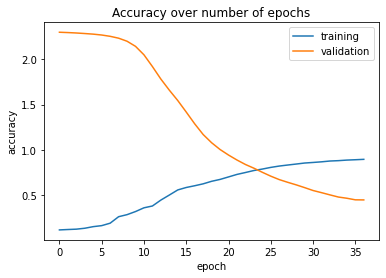


Test loss:  0.502
Test accuracy:  0.889
313/313 [==============================] - 1s 2ms/step - loss: 1.6204 - accuracy: 0.4463


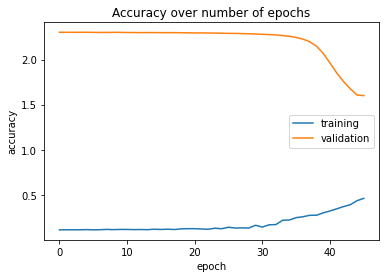


Test loss:  1.62
Test accuracy:  0.446
313/313 [==============================] - 1s 4ms/step - loss: 0.2160 - accuracy: 0.9377


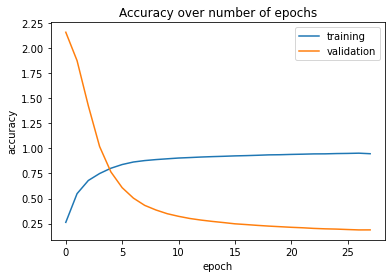


Test loss:  0.216
Test accuracy:  0.938
313/313 [==============================] - 2s 5ms/step - loss: 0.2455 - accuracy: 0.9337


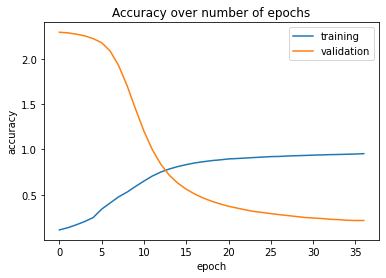


Test loss:  0.246
Test accuracy:  0.934
313/313 [==============================] - 2s 6ms/step - loss: 0.3674 - accuracy: 0.9071


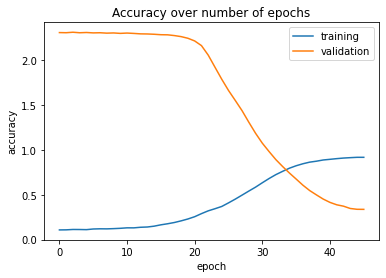


Test loss:  0.367
Test accuracy:  0.907


In [10]:
for nodes in [32,128,512]:
  for layers in [3,4,5]:
    model = createModel([nodes] * layers)
    model_eval(model, epochs=10* layers)